<a href="https://colab.research.google.com/github/Balajivasudevan03/YULU_HYPOTHESIS_TESTING/blob/main/Complete__Yulu_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot

In [ ]:
data = pd.read_csv('/content/bike_sharing.csv')
data.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2261,2011-06-02 03:00:00,2,0,1,1,27.06,31.060,44,7.0015,0,4,4
6858,2012-04-04 02:00:00,2,0,1,1,18.86,22.725,51,0.0000,0,5,5
4335,2011-10-12 16:00:00,4,0,1,2,22.96,26.515,88,15.0013,5,50,55
9043,2012-08-19 04:00:00,3,0,0,2,25.42,30.305,65,11.0014,4,22,26
3810,2011-09-09 18:00:00,3,0,1,1,28.70,33.335,79,12.9980,33,377,410
3248,2011-08-05 06:00:00,3,0,1,1,26.24,29.545,78,8.9981,7,94,101
312,2011-01-14 12:00:00,1,0,1,1,8.20,9.850,44,16.9979,2,59,61
2790,2011-07-05 04:00:00,3,0,1,1,27.06,31.060,69,11.0014,1,4,5
4792,2011-11-12 18:00:00,4,0,0,1,17.22,21.210,58,12.9980,53,150,203
6471,2012-03-06 21:00:00,1,0,1,1,13.12,15.910,49,12.9980,5,143,148


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
data[data.isnull().any(axis=1)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Unique values dataframe!!!

In [ ]:
A = {}
for i in data.columns:
  A[i] = data[i].nunique()

df = pd.DataFrame(A.items(), columns=['Column Name', 'Unique Values'])
df

,Column Name,Unique Values
0,datetime,10886
1,season,4
2,holiday,2
3,workingday,2
4,weather,4
5,temp,49
6,atemp,60
7,humidity,89
8,windspeed,28
9,casual,309


In [ ]:
cat_col = ['season', 'holiday', 'workingday', 'weather']
num_col = ['temp', 'atemp', 'humidity', 'windspeed']

In [ ]:
for i in cat_col:
  print(data[i].value_counts())
  print("---"*(50))

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
holiday
0    10575
1      311
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
workingday
1    7412
0    3474
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------


# Checking for duplicates!!

In [ ]:
data.loc[data.duplicated()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


# checking for the outliers in the data using the box plot

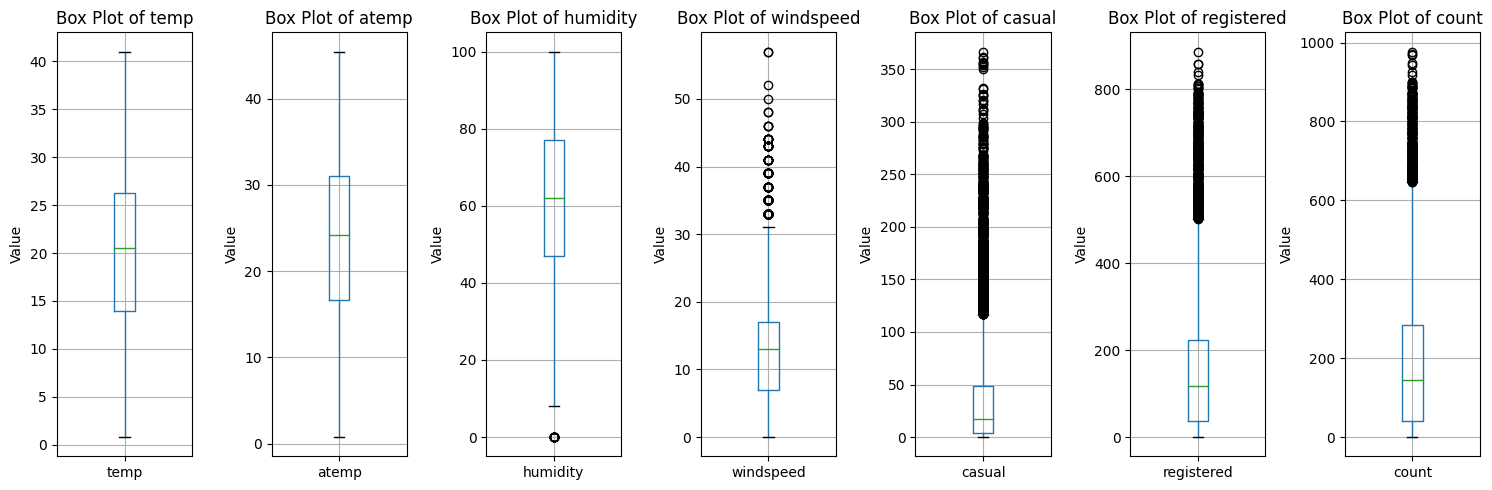

In [ ]:
numerical_columns = data[['temp', 'atemp', 'humidity', 'windspeed',"casual","registered","count"]]
df2 = pd.DataFrame(numerical_columns)
numerical_columns1 = df2.select_dtypes(include=[np.number]).columns
# Plotting each numerical column in separate subplots
num_plots = len(numerical_columns1)
fig, axes = plt.subplots(ncols=num_plots, figsize=(15, 5))

for i, column in enumerate(numerical_columns1):
    ax = axes[i]
    df2.boxplot(column=column, ax=ax)
    ax.set_title(f'Box Plot of {column}')
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

The box plots for several variables, the brief insights and recommendations based on the box plots:

1. *Temperature (temp and atemp)*:
   - *Insights*: Both temperature (temp) and apparent temperature (atemp) are centered around similar ranges with medians approximately at 25°C. The spread of the data is from around 5°C to 40°C.
   - *Recommendations*: The rental service should prepare for a wide range of temperatures, ensuring bikes are maintained to operate in both lower and higher temperature conditions.

2. *Humidity*:
   - *Insights*: The humidity data is fairly distributed between around 20% and 80%, with a few outliers at higher values.
   - *Recommendations*: High humidity can affect the comfort of riders. Providing weather-specific recommendations or additional gear like water-resistant accessories could be beneficial.

3. *Windspeed*:
   - *Insights*: The windspeed data shows a median around 12 units, with many outliers above 30 units.
   - *Recommendations*: Strong winds could discourage bike rentals. Alerting users on windy days and ensuring that bikes are stable and well-maintained can improve safety and satisfaction.

4. *Casual*:
   - *Insights*: The distribution for casual riders is right-skewed with many outliers. The median number of casual riders is quite low, but there are days with a significantly higher number of casual rentals.
   - *Recommendations*: Marketing efforts could target days with lower casual rentals to balance usage and optimize bike availability.

5. *Registered*:
   - *Insights*: The number of registered users shows a similar right-skewed distribution, but with higher median and upper values compared to casual riders.
   - *Recommendations*: Focus on increasing the number of registered users through loyalty programs and subscription benefits.

6. *Count*:
   - *Insights*: The total count of rentals follows a similar pattern with the median around 200 and many outliers.
   - *Recommendations*: Analyze peak usage times and plan for efficient bike distribution and maintenance schedules to meet higher demand.

# Since outliers can affect other parameters!!!
# **Deleting the outliers!**

In [ ]:
from scipy.stats import zscore
z_score =  np.abs(zscore(data.select_dtypes(include=[np.number])))
data_no_outliers = data[(z_score<3).all(axis=1)]
data_no_outliers.shape

(9976, 12)

In [ ]:
data.shape

(10886, 12)

In [ ]:
data_no_outliers.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
3040,2011-07-15 14:00:00,3,0,1,1,28.70,32.575,51,12.9980,105,160,265
3330,2011-08-08 16:00:00,3,0,1,1,35.26,38.635,39,19.0012,64,218,282
3083,2011-07-17 09:00:00,3,0,0,1,29.52,33.335,58,15.0013,74,110,184
5222,2011-12-11 16:00:00,4,0,0,1,12.30,16.665,26,0.0000,32,174,206
1378,2011-04-03 07:00:00,2,0,0,1,13.12,15.150,57,15.0013,13,20,33
6702,2012-03-16 13:00:00,1,0,1,2,18.86,22.725,77,6.0032,52,208,260
9140,2012-09-04 05:00:00,3,0,1,2,27.06,29.545,89,0.0000,1,37,38
2219,2011-05-19 09:00:00,2,0,1,2,22.14,25.760,88,6.0032,40,176,216
1262,2011-03-17 10:00:00,1,0,1,1,18.04,21.970,54,22.0028,9,69,78
2037,2011-05-11 19:00:00,2,0,1,1,22.96,26.515,52,8.9981,60,341,401


In [ ]:
data_no_outliers.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,9976.000000,9976.0,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000,9976.000000
mean,2.498396,0.0,0.712911,1.421812,19.930373,23.342996,62.727847,12.540192,29.295910,139.390537,168.686447
std,1.123456,0.0,0.452426,0.634435,7.733725,8.406991,18.945092,7.838291,36.071364,127.234926,149.592570
min,1.000000,0.0,0.000000,1.000000,0.820000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.0,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,33.000000,38.000000
50%,2.000000,0.0,1.000000,1.000000,19.680000,23.485000,62.000000,11.001400,15.000000,111.000000,134.000000
75%,4.000000,0.0,1.000000,2.000000,26.240000,30.305000,78.000000,16.997900,42.000000,206.000000,259.250000
max,4.000000,0.0,1.000000,3.000000,41.000000,45.455000,100.000000,36.997400,185.000000,608.000000,729.000000


## **Correlation using Heatmap and drawing insights.**

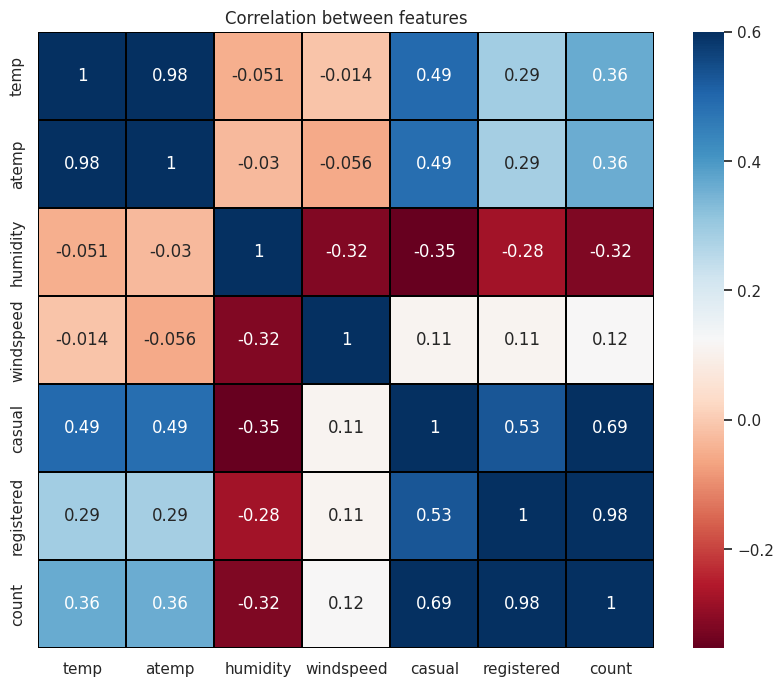

In [ ]:
data_no_outliers1 = data_no_outliers[['temp', 'atemp', 'humidity', 'windspeed',"casual","registered","count"]]
sns.set(font_scale=1.0)
plt.figure(figsize=(10,8))
correlation_values = data_no_outliers1.corr(method = 'pearson')
sns.heatmap(correlation_values, vmax = .6, linewidths=0.01, square=True, annot=True, cmap="RdBu", linecolor="black")
plt.title('Correlation between features');

The heat map shows the correlation between different features. Here are some insights and recommendations based on the correlation matrix:

### Insights:

1. *Temperature and Apparent Temperature (temp and atemp)*:
   - *High Correlation (0.98)*: This indicates that actual temperature and apparent temperature are almost perfectly correlated, which is expected.

2. *Humidity*:
   - *Negative Correlation with Count (-0.32)*: There is a moderate negative correlation between humidity and the total count of rentals. Higher humidity tends to reduce the number of rentals.
   - *Negative Correlation with Casual and Registered (-0.35 and -0.28 respectively)*: Both casual and registered users are less likely to rent bikes when humidity is high.

3. *Windspeed*:
   - *Weak Correlation with Other Variables*: Windspeed has a very weak correlation with other features, indicating that it does not significantly impact rental counts on its own.

4. *Casual Users*:
   - *Positive Correlation with Count (0.69)*: The number of casual users significantly contributes to the total count of rentals.
   - *Moderate Correlation with Temperature (0.49)*: Casual rentals tend to increase with higher temperatures.

5. *Registered Users*:
   - *High Correlation with Count (0.98)*: The number of registered users almost directly dictates the total count of rentals.
   - *Moderate Correlation with Casual Users (0.53)*: There is a moderate positive correlation between casual and registered users, suggesting that when casual rentals are high, registered rentals also tend to be high.

### Recommendations:

1. *Manage Rentals Based on Weather Conditions*:
   - Given the negative impact of high humidity on rentals, consider offering promotions or discounts on humid days to encourage usage.
   - Provide weather forecasts and recommendations to users, potentially suggesting alternative activities on days with high humidity.

2. *Target Casual Users*:
   - Since casual rentals significantly contribute to the total rental count, especially during favorable weather conditions, focus marketing efforts on attracting casual users through promotions and social media campaigns.
   - Organize events or partnerships with local attractions to increase casual rentals.

3. *Enhance User Experience for Registered Users*:
   - Since registered users are a major component of the total rentals, ensure their user experience is optimized. This includes maintaining bike availability, ensuring smooth app functionality, and providing loyalty rewards.

4. *Monitor Temperature Effects*:
   - Promote biking during favorable temperatures by organizing community rides or offering limited-time discounts during optimal temperature ranges.

5. *Consider Wind Effects*:
   - Although windspeed does not show a strong correlation with rentals, ensure that safety measures are in place for windy conditions and communicate these to users.

In [ ]:
data_no_outliers.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2424,2011-06-08 22:00:00,2,0,1,1,31.16,37.120,75,11.0014,37,139,176
2058,2011-05-12 16:00:00,2,0,1,2,26.24,31.060,57,16.9979,50,238,288
10814,2012-12-17 00:00:00,4,0,1,2,15.58,19.695,87,0.0000,2,26,28
1529,2011-04-09 14:00:00,2,0,0,2,14.76,17.425,81,8.9981,94,118,212
10155,2012-11-08 13:00:00,4,0,1,1,18.04,21.970,18,27.9993,33,195,228
4369,2011-10-14 02:00:00,4,0,1,1,22.96,26.515,94,11.0014,0,6,6
9657,2012-10-06 18:00:00,4,0,0,1,21.32,25.000,48,27.9993,183,312,495
4974,2011-12-01 08:00:00,4,0,1,1,10.66,11.365,60,22.0028,15,462,477
3336,2011-08-08 22:00:00,3,0,1,1,31.16,35.605,58,7.0015,26,121,147
6144,2012-02-12 06:00:00,1,0,0,1,4.10,3.790,49,26.0027,0,2,2


**### Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

**###  if day is neither weekend nor holiday is 1, otherwise is 0.**

In [ ]:
data_no_outliers.groupby("workingday")["count"].mean()

workingday
0    154.524791
1    174.389342
Name: count, dtype: float64

**# hypothesis testing!!!**
**## ttest_ind**

In [ ]:
working_day = data_no_outliers[data_no_outliers["workingday"]==1]["count"]
weekend = data_no_outliers[data_no_outliers["workingday"]==0]["count"]

In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(working_day, weekend, alternative='two-sided')

print("t_stat =", t_stat, " , " "P_value =", p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant difference between the no. of bike rides on Weekdays and Weekends")
else:
  print("there is no significant difference between the no. of bike rides on Weekdays and Weekends")

t_stat = 6.010855885836695  , P_value = 1.9101077031769946e-09
__________________________________________________
there is a significant difference between the no. of bike rides on Weekdays and Weekends


**### determining which is significantly high, weekday or weekend?**

In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(working_day, weekend, alternative='greater')

print("t_stat =", t_stat, " , " "P_value =", p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant difference between the no. of bike rides on Weekdays and Weekends")
else:
  print("there is no significant difference between the no. of bike rides on Weekdays and Weekends")

t_stat = 6.010855885836695  , P_value = 9.550538515884973e-10
__________________________________________________
there is a significant difference between the no. of bike rides on Weekdays and Weekends


In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(working_day, weekend, alternative='less')

print("t_stat =", t_stat, " , " "P_value =", p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant difference between the no. of bike rides on Weekdays and Weekends")
else:
  print("there is no significant difference between the no. of bike rides on Weekdays and Weekends")

t_stat = 6.010855885836695  , P_value = 0.9999999990449462
__________________________________________________
there is no significant difference between the no. of bike rides on Weekdays and Weekends


#  conclusion: from the above analysis, we can conclude that working day, earns the more sales, than than the weekends

#  inference: from the above analysis, we can conclude that, there is a significant difference in the rental bike rides on weekends and week days!!!

**### Check if the demand of bicycles on rent is the same for different Weather conditions?**

In [ ]:
data_no_outliers.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6190,2012-02-14 04:00:00,1,0,1,2,10.66,13.635,65,7.0015,0,2,2
3406,2011-08-11 20:00:00,3,0,1,1,29.52,32.575,37,8.9981,56,232,288
3188,2011-08-02 18:00:00,3,0,1,2,35.26,37.880,34,12.9980,65,491,556
6303,2012-02-18 21:00:00,1,0,0,1,18.04,21.970,33,19.9995,25,89,114
3247,2011-08-05 05:00:00,3,0,1,1,26.24,29.545,78,6.0032,0,16,16
5101,2011-12-06 15:00:00,4,0,1,3,20.50,24.240,100,12.9980,2,43,45
10384,2012-11-18 02:00:00,4,0,0,1,11.48,14.395,81,7.0015,8,65,73
10668,2012-12-10 22:00:00,4,0,1,2,20.50,24.240,82,15.0013,11,115,126
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,164,232
4527,2011-11-01 17:00:00,4,0,1,1,18.04,21.970,54,11.0014,36,470,506


### weather:
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


In [ ]:
data_no_outliers["weather"].unique()

array([1, 2, 3])

In [ ]:
weather_1 = data_no_outliers[data_no_outliers["weather"]==1]["count"]
weather_2 = data_no_outliers[data_no_outliers["weather"]==2]["count"]
weather_3 = data_no_outliers[data_no_outliers["weather"]==3]["count"]

In [ ]:
print(weather_1.mean())
print(weather_2.mean())
print(weather_3.mean())

179.37124561670987
160.04531607006854
108.77496839443742


# from the above means we cannot conclude anything, so here there are more than two variables is there, so here we go for the one way anova test!

# Anova assumption test

**### checking the normality of test**
**## shpiro wilk's test and qq-plot**

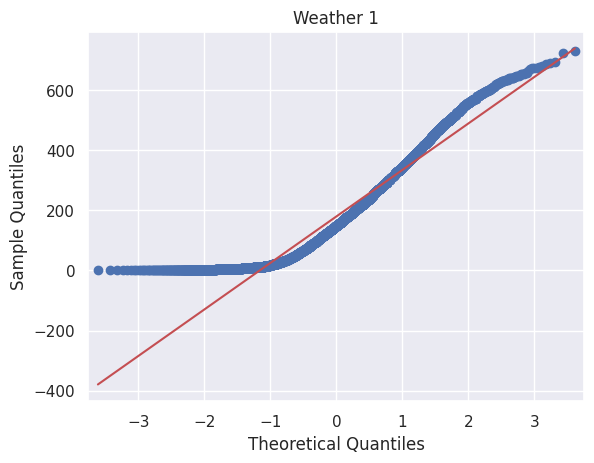

In [ ]:
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
qq_plot = [weather_1, weather_2, weather_3]

qqplot(weather_1, line='s')
plt.title('Weather 1')
plt.show()

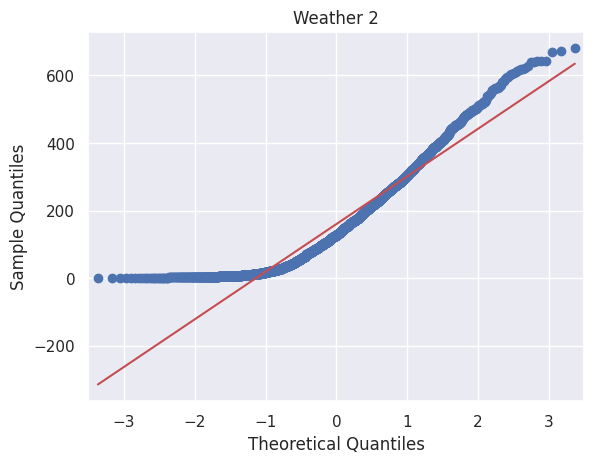

In [ ]:
qqplot(weather_2, line='s')
plt.title('Weather 2')
plt.show()

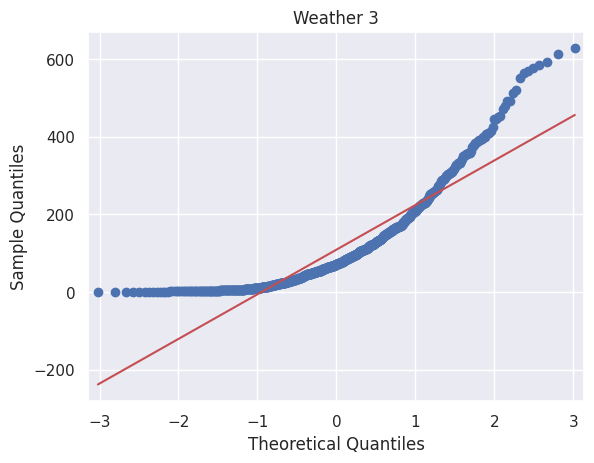

In [ ]:
qqplot(weather_3, line="s")
plt.title('Weather 3')
plt.show()

**### shapiro wilk test**

In [ ]:
from scipy.stats import shapiro
weather_11 = weather_1[:200]
test_stat, p_value = shapiro(weather_11)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Weather 1 is not normally distributed")
else:
  print("Weather 1 is normally distributed")

0.8908871412277222 6.860332441016581e-11
__________________________________________________
Weather 1 is not normally distributed


In [ ]:
weather_12 = weather_2[:200]
test_stat, p_value = shapiro(weather_12)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Weather 2 is not normally distributed")
else:
  print("Weather 2 is normally distributed")

0.8867486715316772 3.8946595948274876e-11
__________________________________________________
Weather 2 is not normally distributed


In [ ]:
weather_13 = weather_3[:200]
test_stat, p_value = shapiro(weather_13)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Weather 3 is not normally distributed")
else:
  print("Weather 3 is normally distributed")

0.7191523313522339 4.190320380132858e-18
__________________________________________________
Weather 3 is not normally distributed


# Analysing for variance among the different groups, namely, waether_1 to weather_3

In [ ]:
from scipy.stats import levene
test_stat, p_value = levene(weather_1, weather_2, weather_3)
print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Variance is not equal")
else:
  print("Variance is equal")

80.86474665762206 1.454131919166258e-35
__________________________________________________
Variance is not equal


# Anova test on different weather impact on number of rides

In [ ]:
from scipy.stats import f_oneway
test_stat, p_value = f_oneway(weather_1, weather_2, weather_3)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant difference in the rental bike rides on different weather")
else:
  print("there is no significant difference in the rental bike rides on different weather")


85.99041490862791 9.401229857957925e-38
__________________________________________________
there is a significant difference in the rental bike rides on different weather


# conclusion: yes there is a significant difference in the rental bike rides on different weather conditions

# which waether earns more and which impact less and gives less number of bike rides?? will see it below!

In [ ]:
print(weather_1.mean())
print(weather_2.mean())
print(weather_3.mean())

179.37124561670987
160.04531607006854
108.77496839443742


# comparing the means of different weather to say which weather earns the most number of rides!!!! using ttest_ind

In [ ]:
t_stat, p_value = ttest_ind(weather_1, weather_2,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during weather_1")
else:
  print("there is no significant increase in the rental bike rides during weather_1")

5.547415286247865 1.4898504932451641e-08
__________________________________________________
there is a significant increase in the rental bike rides during weather_1


In [ ]:
t_stat, p_value = ttest_ind(weather_2, weather_1,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during weather_2")
else:
  print("there is no significant increase in the rental bike rides during weather_2")

-5.547415286247865 0.9999999851014951
__________________________________________________
there is no significant increase in the rental bike rides during weather_2


In [ ]:
t_stat, p_value = ttest_ind(weather_2, weather_3,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during weather_2")
else:
  print("there is no significant increase in the rental bike rides during weather_2")

9.330213145991275 9.230545143444762e-21
__________________________________________________
there is a significant increase in the rental bike rides during weather_2


In [ ]:
t_stat, p_value = ttest_ind(weather_3, weather_2,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during weather_3")
else:
  print("there is no significant increase in the rental bike rides during weather_3")

-9.330213145991275 1.0
__________________________________________________
there is no significant increase in the rental bike rides during weather_3


# inference: from the above analysis, we can say that weather three is the worst performer of all the waether in terms of rental bike rides!!

# conculsion: weather_1 is the maximum yield of all the three weather, interms of rental bike rides!!!

# Check if the demand of bicycles on rent is the same for different Seasons?

In [ ]:
data_no_outliers["season"].unique()

array([1, 2, 3, 4])

In [ ]:
season_1 = data_no_outliers[data_no_outliers["season"]==1]["count"]
season_2 = data_no_outliers[data_no_outliers["season"]==2]["count"]
season_3 = data_no_outliers[data_no_outliers["season"]==3]["count"]
season_4 = data_no_outliers[data_no_outliers["season"]==4]["count"]

# checking the normality using the qq-plot for all the seasons!

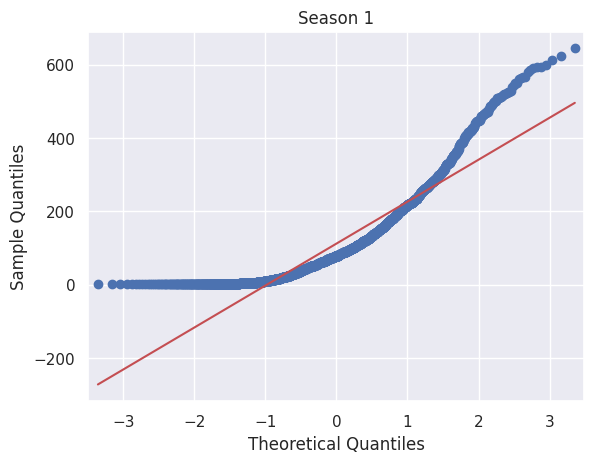

In [ ]:
qqplot(season_1, line='s')
plt.title('Season 1')
plt.show()

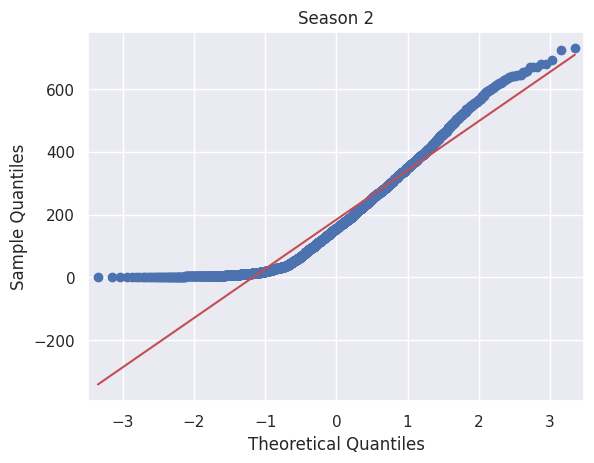

In [ ]:
qqplot(season_2, line='s')
plt.title('Season 2')
plt.show()

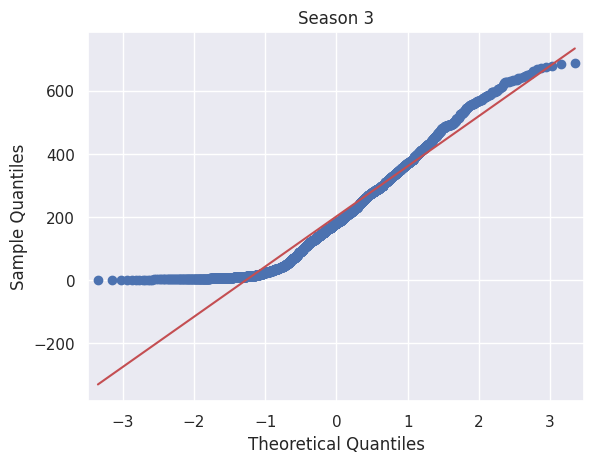

In [ ]:
qqplot(season_3, line='s')
plt.title('Season 3')
plt.show()

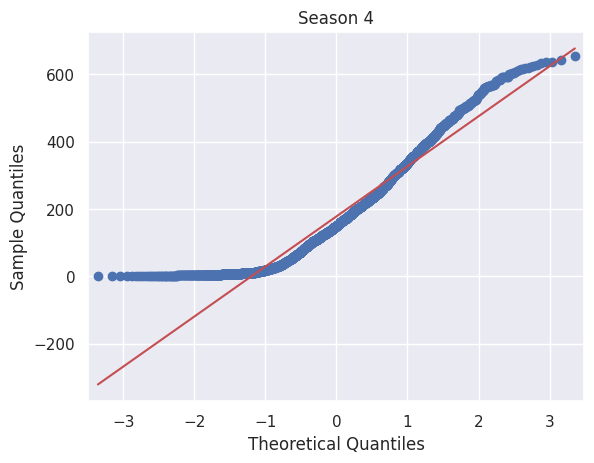

In [ ]:
qqplot(season_4, line='s')
plt.title('Season 4')
plt.show()

# shapiro wilk's test for normality!

In [ ]:
season_11 = season_1.sample(200)
test_stat, p_value = shapiro(season_11)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Season 1 is not normally distributed")
else:
  print("Season 1 is normally distributed")

0.8338838815689087 7.564496175716667e-14
__________________________________________________
Season 1 is not normally distributed


In [ ]:
season_12 = season_2.sample(200)
test_stat, p_value = shapiro(season_12)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Season 2 is not normally distributed")
else:
  print("Season 2 is normally distributed")

0.9103355407714844 1.206164501610374e-09
__________________________________________________
Season 2 is not normally distributed


In [ ]:
season_13 = season_3.sample(200)
test_stat, p_value = shapiro(season_13)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Season 3 is not normally distributed")
else:
  print("Season 3 is normally distributed")

0.9288944602012634 2.7599105223430342e-08
__________________________________________________
Season 3 is not normally distributed


In [ ]:
season_14 = season_4.sample(200)
test_stat, p_value = shapiro(season_14)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Season 4 is not normally distributed")
else:
  print("Season 4 is normally distributed")

0.8987250924110413 2.0860724259108565e-10
__________________________________________________
Season 4 is not normally distributed


# checking for the variance between the groups of season_1 to season_4

In [ ]:
test_stat, p_value = levene(season_1, season_2, season_3, season_4)

print(test_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("Variance is not equal")
else:
  print("Variance is equal")

144.62789958450958 9.724623184713818e-92
__________________________________________________
Variance is not equal


**# Anova test for season**

In [ ]:
f_stat, p_value = f_oneway(season_1, season_2, season_3, season_4)

print(f_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is one or more season is significant different in the rental bike rides in all the season")
else:
  print("there is no significant difference in the rental bike rides on different seasons")

182.60445044363416 2.8628894021914896e-115
__________________________________________________
there is one or more season is significant different in the rental bike rides in all the season


# conclusion: there is atleast one or more groups is significantly different from others.

# inference: which group is significantly different from others, will see it below using the ttest_ind

# common inference from the mean of the different groups, and checking if they are significantly different or not using ttest_ind!!!!

In [ ]:
print(season_1.mean())
print(season_2.mean())
print(season_3.mean())
print(season_4.mean())

112.00832342449465
183.78453483689086
202.08957055214725
178.1279207920792


# checking which season would earn more on rental rides using the ttest_ind!!

# since the season_3 measn is high we can check wheather the mean is significantlt different or not!!!

In [ ]:
t_stat, p_value = ttest_ind(season_3, season_1,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during season_3")
else:
  print("there is no significant increase in the rental bike rides during season_3")

22.980869050640862 1.897458577743358e-111
__________________________________________________
there is a significant increase in the rental bike rides during season_3


In [ ]:
t_stat, p_value = ttest_ind(season_3, season_2,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during season_3")
else:
  print("there is no significant increase in the rental bike rides during season_3")

4.0704358236066485 2.383022799776658e-05
__________________________________________________
there is a significant increase in the rental bike rides during season_3


In [ ]:
t_stat, p_value = ttest_ind(season_3, season_4,alternative = "greater")

print(t_stat, p_value)

print("_"*(50))

if p_value < 0.05:
  print("there is a significant increase in the rental bike rides during season_3")
else:
  print("there is no significant increase in the rental bike rides during season_3")

5.488861055396718 2.1231334769613448e-08
__________________________________________________
there is a significant increase in the rental bike rides during season_3


### conculsion : season three earns the more number of rides among all the season and profitable!!!

### inference : season three is the most profitable season and season_3 is significantly high in all the three seasons!!!

### recommendations : we need to implement the same principle and rule and startegy as same as in the season three, and chnaging the bike condidtions accordingly to the season is nescessary.

# Check if the Weather conditions are significantly different during different Seasons?

**## chi-squared_test are to be followed!!!**

In [ ]:
relation_between_season_weather = pd.crosstab(index=data_no_outliers["season"], columns = data_no_outliers["weather"])
relation_between_season_weather

weather,1,2,3
season,,,
1,1662,678,183
2,1606,661,216
3,1741,525,179
4,1550,762,213


**# overall_impact using the chi-suqred test**

In [ ]:
chi_stat, p_value, dof, expected = chi2_contingency(relation_between_season_weather)

print(chi_stat)
print("---"*(50))
print(p_value)
print("---"*(50))
print(dof)
print("---"*(50))
print(expected)

print("---"*(50))

if p_value < 0.05:
  print("there is a significant difference in renting the bikes the during different weather in different seasons")
else:
  print("there is no significant difference in renting the bikes during different weather and during different seasons")

60.575803584666396
------------------------------------------------------------------------------------------------------------------------------------------------------
3.4379351582226456e-11
------------------------------------------------------------------------------------------------------------------------------------------------------
6
------------------------------------------------------------------------------------------------------------------------------------------------------
[[1658.81686047  664.13372093  200.0494186 ]
 [1632.51774258  653.60445068  196.87780674]
 [1607.53358059  643.60164395  193.86477546]
 [1660.13181636  664.66018444  200.2079992 ]]
------------------------------------------------------------------------------------------------------------------------------------------------------
there is a significant difference in renting the bikes the during different weather in different seasons


### conclusion : overall there is a significant difference in renting the bike and across all the weather and season.

### inference :  to see which weather is affecting the season, we can do this by implementing the ttest_ind on comparing their means.

**# impact of weather_1_2 in all the season!!!**

In [ ]:
weather_1_impact = pd.crosstab(index=data_no_outliers["season"], columns = data_no_outliers["weather"], margins=True)
weather_1_impact

weather,1,2,3,All
season,,,,
1,1662,678,183,2523
2,1606,661,216,2483
3,1741,525,179,2445
4,1550,762,213,2525
All,6559,2626,791,9976


In [ ]:
#data_no_outliers[(data_no_outliers["weather"]==1)&(data_no_outliers["season"]==1)] ## cross_checking!!!

In [ ]:
weather_1_2_impact = pd.crosstab(index = data_no_outliers["season"], columns = data_no_outliers[data_no_outliers["weather"]!=3]["weather"], margins=True)

weather_1_2_impact

weather,1,2,All
season,,,
1,1662,678,2340
2,1606,661,2267
3,1741,525,2266
4,1550,762,2312
All,6559,2626,9185


**# chi-squared-test**

In [ ]:
chi_stat, p_value, dof, expected = chi2_contingency(weather_1_2_impact)

print(chi_stat)
print("---"*(50))
print(p_value)
print("---"*(50))
print(dof)
print("---"*(50))
print(expected)

print("---"*(50))

if p_value < 0.05:
  print("there is a significant difference in renting the bikes the across all the season and during the weather_1_2")
else:
  print("there is no significant difference in renting the bikes across all the season and during the weather_1_2")

54.75997786633164
------------------------------------------------------------------------------------------------------------------------------------------------------
4.915410529812891e-09
------------------------------------------------------------------------------------------------------------------------------------------------------
8
------------------------------------------------------------------------------------------------------------------------------------------------------
[[1670.99183451  669.00816549 2340.        ]
 [1618.86260207  648.13739793 2267.        ]
 [1618.14850299  647.85149701 2266.        ]
 [1650.99706042  661.00293958 2312.        ]
 [6559.         2626.         9185.        ]]
------------------------------------------------------------------------------------------------------------------------------------------------------
there is a significant difference in renting the bikes the across all the season and during the weather_1_2


## impact of weather_2_3 on all seasons

In [ ]:
waether_impact_2_3 = pd.crosstab(index = data_no_outliers["season"], columns = data_no_outliers[data_no_outliers["weather"]!=1]["weather"], margins=True)

waether_impact_2_3

weather,2,3,All
season,,,
1,678,183,861
2,661,216,877
3,525,179,704
4,762,213,975
All,2626,791,3417


**# chi-squared-test**

In [ ]:
chi_stat, p_value, dof, expected = chi2_contingency(waether_impact_2_3)

print(chi_stat)
print("---"*(50))
print(p_value)
print("---"*(50))
print(dof)
print("---"*(50))
print(expected)


if p_value < 0.05:
  print("there is a significant difference in renting the bikes the across all the season and during the weather_2_3")
else:
  print("there is no significant difference in renting the bikes across all the season and during the weather_2_3")

5.799951412931711
------------------------------------------------------------------------------------------------------------------------------------------------------
0.6696288510446907
------------------------------------------------------------------------------------------------------------------------------------------------------
8
------------------------------------------------------------------------------------------------------------------------------------------------------
[[ 661.68744513  199.31255487  861.        ]
 [ 673.98361135  203.01638865  877.        ]
 [ 541.03131402  162.96868598  704.        ]
 [ 749.2976295   225.7023705   975.        ]
 [2626.          791.         3417.        ]]
there is no significant difference in renting the bikes across all the season and during the weather_2_3


**# impact of weather_1_3 on all  the season!!!**

In [ ]:
impact_weather_1_3 = pd.crosstab(index = data_no_outliers["season"], columns = data_no_outliers[data_no_outliers["weather"]!=2]["weather"], margins=True)

impact_weather_1_3

weather,1,3,All
season,,,
1,1662,183,1845
2,1606,216,1822
3,1741,179,1920
4,1550,213,1763
All,6559,791,7350


**# chi-squared-test**

In [ ]:
chi_stat, p_value, dof, expected = chi2_contingency(impact_weather_1_3)

print(chi_stat)
print("---"*(50))
print(p_value)
print("---"*(50))
print(dof)
print("---"*(50))
print(expected)

if p_value < 0.05:
  print("there is a significant difference in renting the bikes the across all the season and during the weather_1_3")
else:
  print("there is no significant difference in renting the bikes across all the season and during the weather_1_3")

10.970490936548156
------------------------------------------------------------------------------------------------------------------------------------------------------
0.20337683635793988
------------------------------------------------------------------------------------------------------------------------------------------------------
8
------------------------------------------------------------------------------------------------------------------------------------------------------
[[1646.44285714  198.55714286 1845.        ]
 [1625.91809524  196.08190476 1822.        ]
 [1713.37142857  206.62857143 1920.        ]
 [1573.26761905  189.73238095 1763.        ]
 [6559.          791.         7350.        ]]
there is no significant difference in renting the bikes across all the season and during the weather_1_3


## conculsion: weather three (weather_3) is affecting the sales and rental across all the seasons, weather three is the worst number of churning of customers during all the seasons in-terms of bike rentals!!!

## inference : weather_1_2 has the major significant on the all the season, but weather 3 has no impact on all season, so need to improve on the weather_3 sales..

  

# date-time conversion

In [ ]:
data["datetime"] = pd.to_datetime(data["datetime"])
data["hour"] = data["datetime"].dt.hour
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(8)
memory usage: 1.0 MB


# categorical visualisation

**# univariate analysis, bivariate and multivariate**

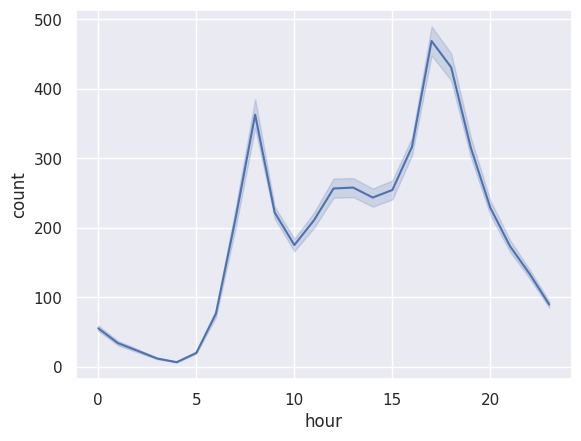

In [ ]:
sns.lineplot(x="hour", y="count", data=data)
plt.show()

The line plot shows the count of an event or activity over different hours of the day. Here are some insights and recommendations:

### Insights:

1. **Peak Hours**: There are two noticeable peaks in the activity. The first peak occurs around 8 AM, and the second, larger peak occurs around 5 PM.
2. **Off-Peak Hours**: The lowest activity counts are observed in the early morning hours (midnight to around 5 AM) and late evening (after 9 PM).
3. **Mid-Day Dip**: There is a dip in activity around 11 AM, followed by a gradual increase that continues through the afternoon.
4. **Consistent Mid-Day Activity**: After the initial peak, there is relatively consistent activity from around 11 AM to 4 PM, although it fluctuates slightly.

### Recommendations:

1. **Resource Allocation**:
   - **Morning and Evening Peaks**: Allocate more resources (e.g., staff, system capacity) around the peak hours (8 AM and 5 PM) to handle the higher volume of activity.
   - **Off-Peak Hours**: During low activity periods (early morning and late evening), you can reduce resource allocation to save costs.

2. **Operational Planning**:
   - **Shift Schedules**: Plan staff shifts to ensure more coverage during peak hours and less during off-peak hours.
   - **Maintenance Windows**: Schedule system maintenance during off-peak hours (e.g., early morning or late night) to minimize the impact on users.

3. **Marketing and Engagement**:
   - **Targeted Campaigns**: Schedule marketing campaigns or engagement activities during the times when activity is high (8 AM and 5 PM) to maximize reach and effectiveness.
   - **Incentives for Off-Peak Usage**: Offer incentives or discounts to encourage usage during off-peak hours to help distribute the load more evenly throughout the day.

4. **Performance Monitoring**:
   - **Real-Time Monitoring**: Implement real-time monitoring during peak hours to quickly identify and address any issues that may arise due to high activity.


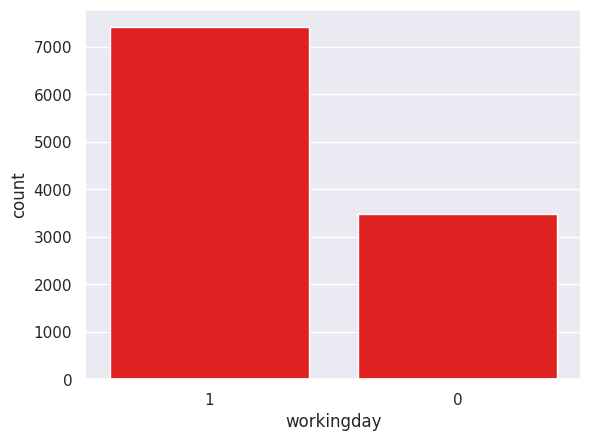

In [ ]:
sns.countplot(x="workingday", data=data, order=data["workingday"].value_counts().index, color="red")
plt.show()

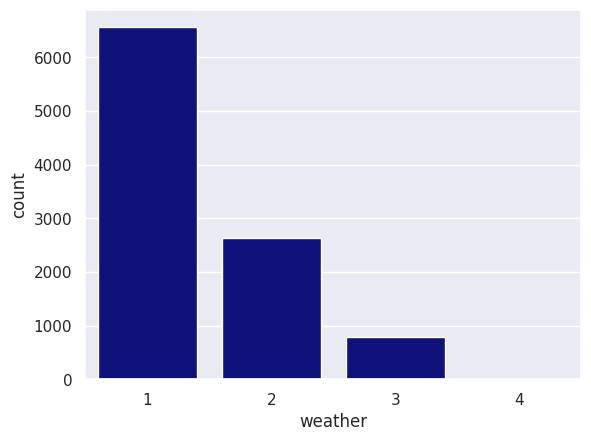

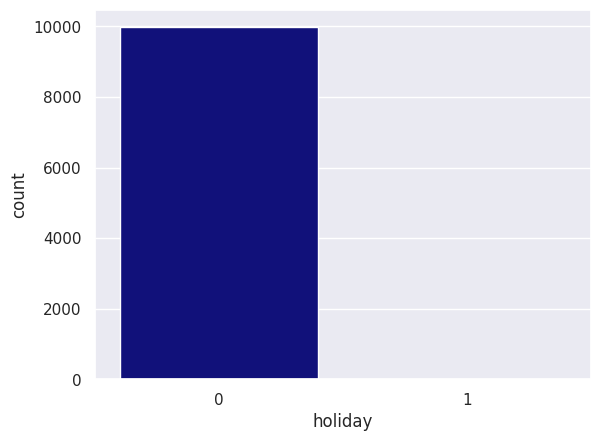

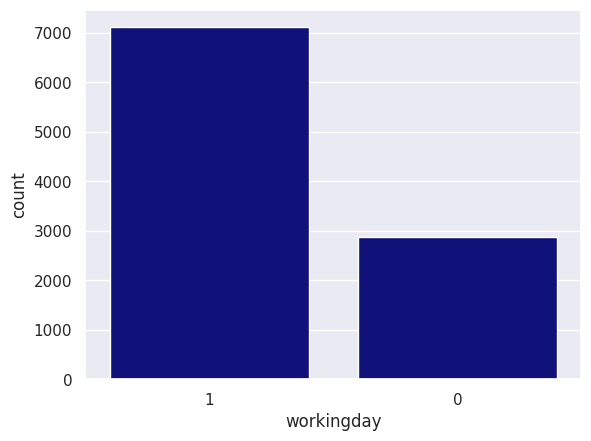

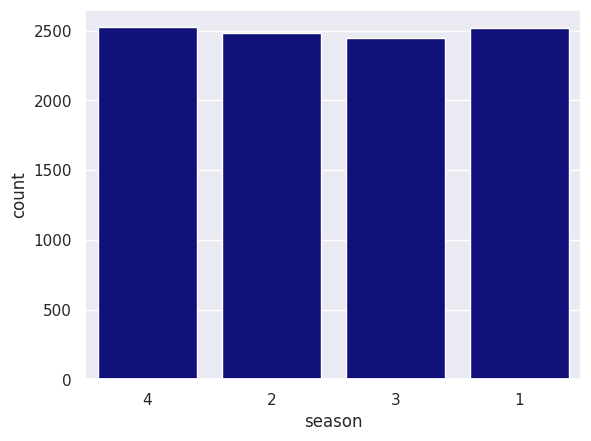

In [ ]:
count_plot = ["weather", "holiday", "workingday", "season"]
for i in count_plot:
  sns.countplot(x=i, data=data_no_outliers, order=data[i].value_counts().index,color="darkblue")
  plt.show()


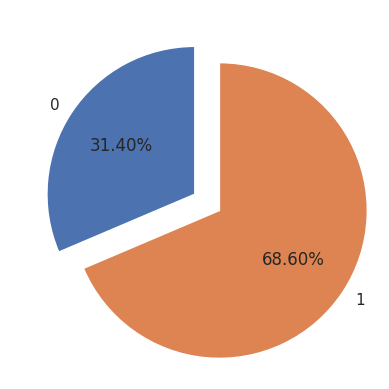

In [ ]:
A = data.groupby("workingday")["count"].sum().reset_index()

plt.pie(A["count"], labels=A["workingday"], autopct="%1.2f%%", explode = (0,0.2), startangle=90)
plt.show()

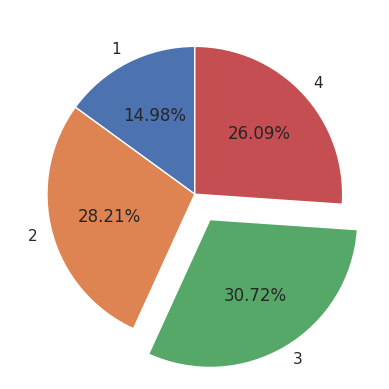

In [ ]:
B = data.groupby("season")["count"].sum().reset_index()

plt.pie(B["count"], labels=B["season"], autopct="%1.2f%%", explode = (0,0,0.2,0), startangle=90)
plt.show()

The pie chart depicts the distribution of four categories labeled 1, 2, 3, and 4. Here are some insights and recommendations based on the pie chart:

### Insights:

1. *Category 3*:
   - *Largest Segment (30.72%)*: This category represents the largest proportion of the distribution.

2. *Category 2*:
   - *Second Largest Segment (28.21%)*: This category makes up the second largest proportion.

3. *Category 4*:
   - *Third Largest Segment (26.09%)*: This category holds a significant portion but is smaller than categories 2 and 3.

4. *Category 1*:
   - *Smallest Segment (14.98%)*: This category is the smallest in the distribution.

### Recommendations:

1. *Focus on Category 3*:
   - Since Category 3 holds the largest share, efforts should be made to understand why it is the most significant and ensure resources are allocated effectively to maintain or grow this segment.

2. *Leverage Strengths in Category 2*:
   - With Category 2 being the second largest, there is an opportunity to leverage its strengths. Identify what drives this segment and replicate successful strategies in other areas if possible.

3. *Analyze and Improve Category 4*:
   - Although Category 4 has a substantial share, there is room for growth. Conduct a detailed analysis to understand potential improvements or innovations that could increase its proportion.

4. *Increase Focus on Category 1*:
   - Since Category 1 has the smallest share, evaluate why it is underrepresented. Consider whether it is due to a lack of awareness, accessibility issues, or other barriers. Implement targeted marketing or improvement initiatives to boost this segment.

5. *Balance Resource Allocation*:
   - Ensure that resources are balanced appropriately across all categories. While focusing on the largest segments, do not neglect the smaller ones, as they may have untapped potential for growth.

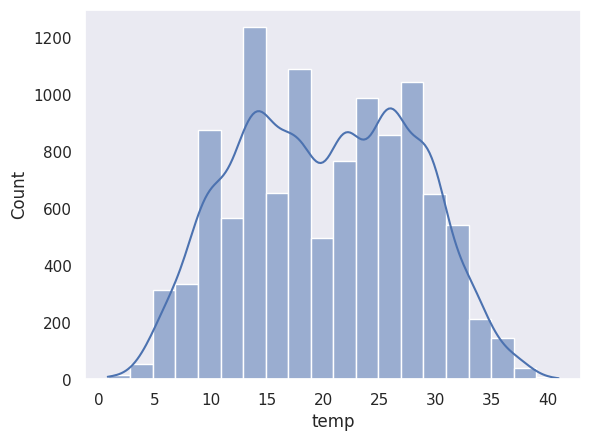

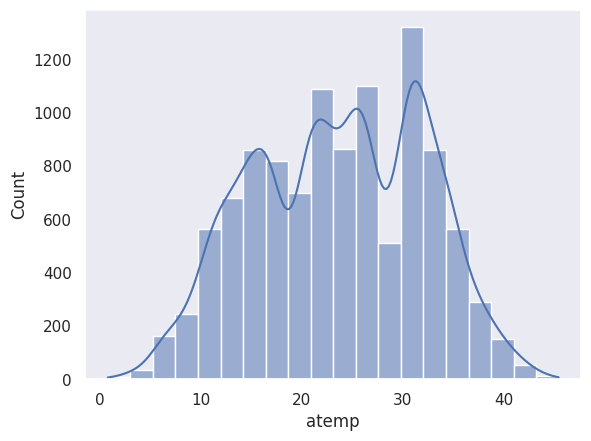

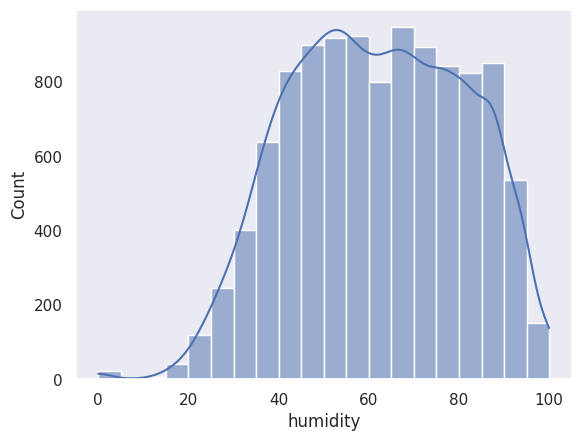

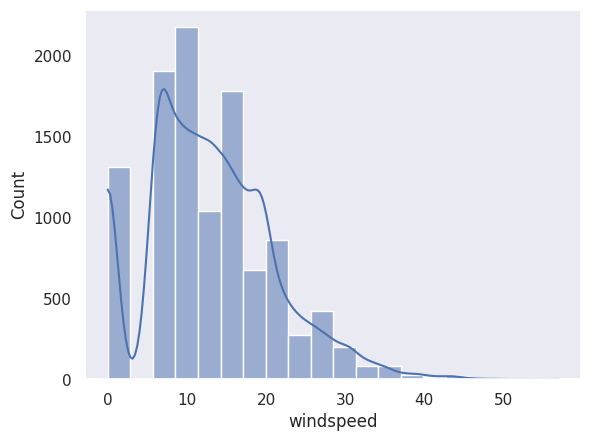

In [ ]:
hist_plot = ["temp", "atemp", "humidity", "windspeed"]
for i in hist_plot:
  sns.histplot(data[i], bins=20, kde=True)
  plt.grid()
  plt.show()

The histogram overlaid with a density plot illustrates the distribution of a temperature dataset. Here are some key insights and recommendations based on the plot:

### Insights:
1. **Central Tendency**:
   - The highest concentration of temperature values is around 15°C, indicated by the tallest bar in the histogram.
   - There's a secondary peak around 10°C.

2. **Distribution Shape**:
   - The distribution appears to be multimodal, with several peaks and valleys. This suggests the presence of multiple groups or clusters within the data.
   - There is a noticeable drop in frequency around 20°C, indicating fewer occurrences in this range.

3. **Spread and Range**:
   - The temperature values range from 0°C to 40°C, showing a broad spread.
   - Most of the temperatures fall between 10°C and 30°C.

4. **Skewness**:
   - The distribution shows slight skewness with more values concentrated in the lower to mid-temperature ranges, tapering off as temperatures increase towards 40°C.

### Recommendations:
1. **Further Analysis**:
   - **Cluster Analysis**: Given the multimodal nature, perform a cluster analysis to identify distinct groups within the dataset.
   - **Seasonal or Temporal Breakdown**: Investigate if the multimodal distribution is due to seasonal or temporal factors (e.g., different times of the year, specific months).

2. **Data Collection and Refinement**:
   - **Increase Granularity**: If possible, collect more granular data to see if the gaps in the distribution, especially around 20°C, are due to sampling issues.
   - **Additional Variables**: Incorporate other variables like humidity, time of day, and geographical location to understand their impact on temperature distribution.

3. **Modeling and Prediction**:
   - **Predictive Modeling**: Use this data for predictive modeling, ensuring models account for the multimodal nature of the data.
   - **Anomaly Detection**: Implement anomaly detection methods to identify and investigate unusual temperature readings.

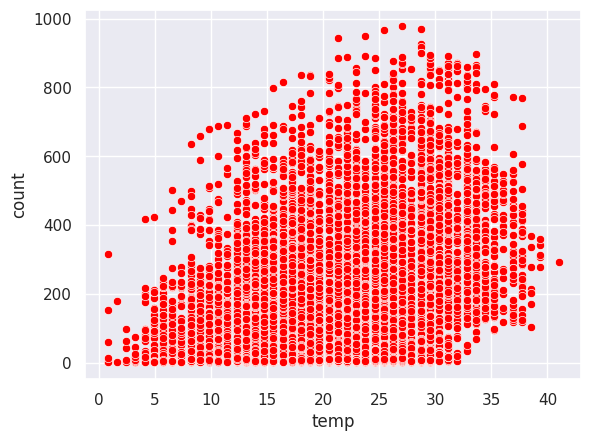

In [ ]:
sns.scatterplot(x="temp", y="count", data=data, color="red")
plt.show()

The scatter plot shows the relationship between "temp" (temperature) and "count" (likely a count of some events or observations). Here are some insights and recommendations based on the plot:

### Insights:
1. **Positive Correlation**: There is a noticeable positive correlation between temperature and count. As the temperature increases, the count also tends to increase.
2. **Density of Data Points**: The data points are more densely populated between the temperature range of 15 to 30 degrees. This suggests that most of the events or observations occur within this temperature range.
3. **Variability at Higher Temperatures**: At higher temperatures (above 30 degrees), the count values show more variability, indicating that while higher counts are possible, they are less consistent.
4. **Lower Bound**: There is a clear lower bound in the count that seems to rise with temperature up to a certain point (around 25-30 degrees), suggesting that there might be a minimum count that increases with temperature.
5. **Maximum Count**: The highest counts appear to occur at temperatures around 25-30 degrees, suggesting that this temperature range might be optimal for the events or observations being counted.

### Recommendations:
1. **Focus on Optimal Temperature Range**: If your goal is to maximize the count, you should focus on the temperature range of 20-30 degrees, where the counts are generally higher.
2. **Investigate Variability**: Further investigation into the variability of counts at higher temperatures could provide insights. Understanding why there is more variability could help in making more accurate predictions or decisions.
3. **Consider External Factors**: Examine if there are other external factors influencing the count, especially at higher temperatures where the variability is more significant.
4. **Data Segmentation**: Segment the data into different temperature ranges and analyze them separately. This can provide more detailed insights and help in understanding specific patterns within each range.


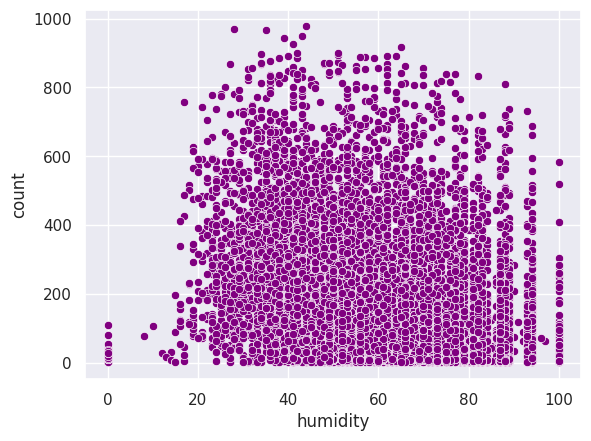

In [ ]:
sns.scatterplot(x="humidity", y="count", data=data, color="purple")
plt.show()

The scatter plot depicts the relationship between humidity and count, with humidity on the x-axis (ranging from 0 to 100) and count on the y-axis (ranging from 0 to 1000). Here are some insights and recommendations based on the plot:

### Insights:
1. **Distribution Spread**:
   - The data points are spread across the entire range of humidity levels, from 0 to 100.
   - There is a high density of points in the middle range of humidity (around 40 to 60).

2. **Count Variation**:
   - The count varies significantly across different humidity levels.
   - At lower humidity levels (0-20), the count is relatively lower and less dense compared to mid-range humidity.
   - The highest density of counts appears between 40 and 60 humidity levels.

3. **Extreme Humidity Levels**:
   - At extremely low humidity (near 0) and extremely high humidity (near 100), the count seems to be less frequent or lower compared to mid-range levels.
   - There are still notable counts at these extremes but fewer in comparison to the middle range.

### Recommendations:
1. **Further Analysis**:
   - Conduct further statistical analysis to identify if there are any significant correlations or patterns between humidity and count.
   - Use statistical tests such as Pearson or Spearman correlation coefficients to quantify the relationship.

2. **Segment Analysis**:
   - Consider segmenting the data into different humidity ranges (e.g., 0-20, 20-40, 40-60, 60-80, 80-100) and analyzing the count distribution within each segment. This can provide more granular insights.

3. **Additional Variables**:
   - Introduce other variables that might influence count, such as temperature, time of day, or season, to see if they interact with humidity in affecting the count.
   - A multivariate analysis could reveal more complex relationships and contributing factors.

4. **Data Smoothing**:
   - Apply smoothing techniques, like a moving average or LOESS (Local Regression), to better understand the trend and reduce noise in the scatter plot.
   
5. **Outlier Analysis**:
   - Investigate any potential outliers that might be present in the data, especially at the extreme humidity levels, to ensure they are valid observations and not errors.

<ipython-input-113-5863037318a6>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(x="season", hue = "weather", data = data, color="red")


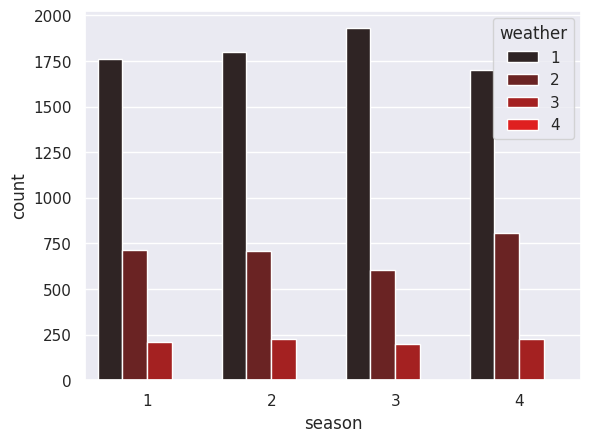

In [ ]:
sns.countplot(x="season", hue = "weather", data = data, color="red")
plt.show()

The bar plot represents the count of different weather types across four seasons. Here's an analysis and some recommendations based on the plot:

### Insights

1. **Weather Type 1 Dominates**: In all four seasons, weather type 1 has the highest count. This suggests that the conditions represented by this weather type are the most common throughout the year.

2. **Weather Type 2**: This weather type also has a significant presence across all seasons but is notably less frequent than weather type 1. Its count remains relatively consistent, indicating it is a common secondary weather type.

3. **Weather Type 3 and 4**: These weather types have much lower counts across all seasons. Weather type 3 is slightly more frequent than type 4 in most seasons.

4. **Seasonal Variation**:
   - **Season 3** has the highest count for weather type 1, suggesting this season experiences the most frequent occurrence of weather type 1 conditions.
   - **Season 4** has the least amount of weather type 1 but the highest occurrence of weather type 2, indicating a potential shift in weather patterns.
   - **Season 1 and Season 2** have similar patterns with high counts for weather type 1 and moderate counts for weather type 2.

### Recommendations

1. **Resource Allocation**:
   - Given the high occurrence of weather type 1, ensure resources and contingency plans are well-prepared to handle this weather condition in all seasons.
   - Also, prepare for weather type 2 but to a lesser extent.

2. **Infrastructure Planning**:
   - If weather types 3 and 4 represent extreme or adverse conditions, even though their counts are low, it’s essential to have emergency response plans in place, especially for seasons with slightly higher counts.

3. **Further Analysis**:
   - Investigate what specific conditions each weather type represents and their impact on activities or operations.
   - Understand the factors contributing to the seasonal variation, especially for weather types 1 and 2.

4. **Seasonal Adjustments**:
   - For seasons with higher counts of adverse weather types (e.g., if type 3 or 4 are severe), consider adjusting schedules, activities, or providing additional support.
